<a href="https://colab.research.google.com/github/jimin-fundamental/ML-2024-fall/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. [Simple Two Hidden Layer Neural Network (MNIST)]**

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1) Preprocess the MNIST dataset and split it into training and testing sets

In [ ]:
# 데이터 전처리
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


훈련 데이터 크기: (60000, 28, 28), 훈련 레이블 크기: (60000,)
테스트 데이터 크기: (10000, 28, 28), 테스트 레이블 크기: (10000,)


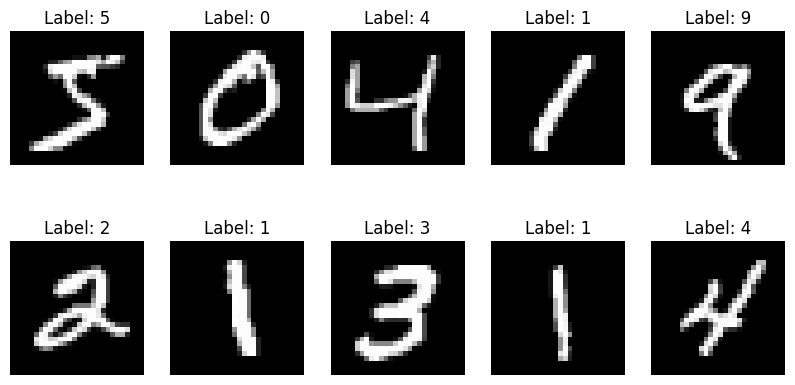

In [ ]:
# 데이터 구조 탐색

# 데이터셋 크기 출력
print(f"훈련 데이터 크기: {X_train_full.shape}, 훈련 레이블 크기: {y_train_full.shape}")
print(f"테스트 데이터 크기: {X_test.shape}, 테스트 레이블 크기: {y_test.shape}")

# 데이터 예제 시각화
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
plt.show()


2) Scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
# 픽셀 값을 0-1 범위로 정규화
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

3) Implement a two hidden layer neural network using the loss function of loss="sparse_categorical_crossentropy"

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),# 입력 레이어(Flatten)
    tf.keras.layers.Dense(128, activation='relu'), #첫번째 hidden layer(Dense)
    tf.keras.layers.Dense(64, activation='relu'), # 두번째 hidden layer(Dense)
    tf.keras.layers.Dense(10, activation='softmax') # 출력 layer(Dense)
])
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4) Train the model on the training data

In [ ]:
# 모델 훈련
history = model.fit(X_train_full, y_train_full, epochs=8, batch_size=32, validation_split=0.1, verbose = 1)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8635 - loss: 0.4511 - val_accuracy: 0.9665 - val_loss: 0.1108
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9664 - loss: 0.1125 - val_accuracy: 0.9703 - val_loss: 0.0973
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9765 - loss: 0.0761 - val_accuracy: 0.9743 - val_loss: 0.0891
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9826 - loss: 0.0555 - val_accuracy: 0.9788 - val_loss: 0.0800
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9861 - loss: 0.0422 - val_accuracy: 0.9755 - val_loss: 0.0876
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9750 - val_loss: 0.0914
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9772 - val_loss: 0.0899
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0229 - val

5) Evaluate the model's performance on the testing data.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.1115
Test accuracy: 0.9752


6) Analyze and discuss the results, including accuracy, confusion matrix, and any observed limitations

In [ ]:
# Confusion Matrix 및 Classification Report
y_pred = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 971    1    0    1    1    0    4    0    1    1]
 [   0 1125    4    1    0    0    2    0    3    0]
 [   7    0 1008    2    1    0    3    8    3    0]
 [   0    0    8  988    0    2    0    6    4    2]
 [   1    0    3    1  966    0    3    2    1    5]
 [   4    1    1   19    3  828   14    1   14    7]
 [   3    4    1    1    4    1  940    0    4    0]
 [   1    4    6    1    3    0    0 1007    0    6]
 [   6    2    3    3    7    0    3    4  943    3]
 [   3    2    0    6   12    2    0    5    3  976]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.93      0.96       892
           6       0.97      0.98      0.98      

7) experiment with different epochs, hyperparameters, such as the number of hidden units, learning rates, optimizers (SGD, Momentum, RMSProp, Adam, etc), and nonlinear activation functions (such as ReLU, Sigmoid, Tanh)

7-1.서로 다른 epochs에 대한 Accuracy 및 Loss 시각화

In [ ]:
# 모델 정의 함수
from typing import Callable

def build_model(optimizer: tf.keras.optimizers.Optimizer) -> tf.keras.Model:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
     # Optimizer 인스턴스 생성
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 특정 Epoch에서 테스트 데이터로 평가할 Epoch 리스트
epochs_to_plot = [2, 4, 8, 16, 32]
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []
optimizer = tf.keras.optimizers.Adam

# 각 Epoch마다 모델 훈련 후 테스트 데이터로 평가
for ep in epochs_to_plot:
    print(f"Training for {ep} epochs...")
    model = build_model(optimizer)
    history = model.fit(X_train_full, y_train_full, epochs=ep, batch_size=32, validation_split=0.1, verbose=1)

    # 훈련 데이터 평가
    train_loss, train_acc = model.evaluate(X_train_full, y_train_full, verbose=0)
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    # 테스트 데이터 평가
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)

Training for 2 epochs...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8729 - loss: 0.4402 - val_accuracy: 0.9652 - val_loss: 0.1225
Epoch 2/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9663 - loss: 0.1145 - val_accuracy: 0.9742 - val_loss: 0.0906
Training for 4 epochs...
Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8671 - loss: 0.4567 - val_accuracy: 0.9663 - val_loss: 0.1066
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9663 - loss: 0.1100 - val_accuracy: 0.9707 - val_loss: 0.1003
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9782 - loss: 0.0735 - val_accuracy: 0.9738 - val_loss: 0.0830
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9835 - loss: 0.0527 - val_accuracy: 0.9767 - val_loss: 0.0907
Training for 8 epochs...
Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8703 - loss: 0.4470 - val_accuracy: 0.9667 - val_loss: 0.1153
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1

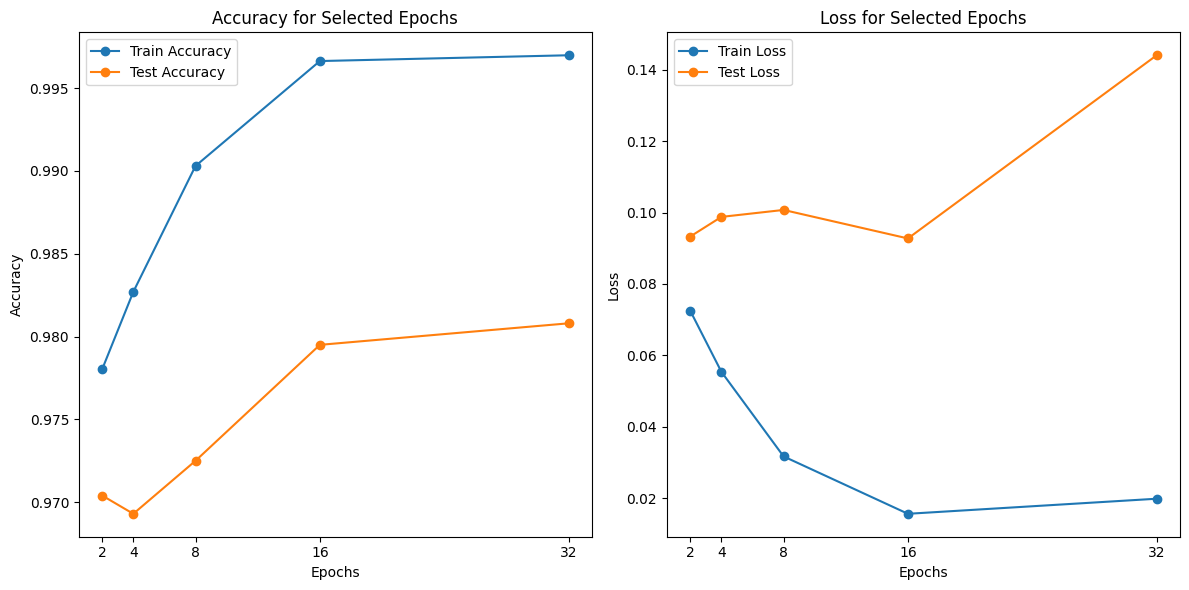

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.plot(epochs_to_plot, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_to_plot, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs_to_plot)
plt.legend()
plt.title('Accuracy for Selected Epochs')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs_to_plot, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_to_plot, test_losses, label='Test Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs_to_plot)
plt.legend()
plt.title('Loss for Selected Epochs')

plt.tight_layout()
plt.show()

7.2. 서로 다른 learning rates에 대한 Accuracy 및 Loss 시각화

In [ ]:
# 기존 - Adam 옵티마이저의 기본 learning rate인 0.001이 자동으로 적용 - model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 서로 다른 learning rates 설정
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.0001]
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

def build_model(optimizer: tf.keras.optimizers.Optimizer) -> tf.keras.Model:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
     # Optimizer 인스턴스 생성
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 각 learning rate마다 모델 훈련 후 테스트 데이터로 평가
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model = build_model(optimizer)
    history = model.fit(X_train_full, y_train_full, epochs=8, batch_size=32, validation_split=0.1, verbose=1)

    # 훈련 데이터 평가
    train_loss, train_acc = model.evaluate(X_train_full, y_train_full, verbose=0)
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    # 테스트 데이터 평가
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)


Training with learning rate: 0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1028 - loss: 19.9199 - val_accuracy: 0.0995 - val_loss: 2.3126
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1028 - loss: 2.3590 - val_accuracy: 0.1113 - val_loss: 2.3274
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1008 - loss: 2.3623 - val_accuracy: 0.0952 - val_loss: 2.4277
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.0978 - loss: 2.3623 - val_accuracy: 0.0992 - val_loss: 2.3427
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1039 - loss: 2.3580 - val_accuracy: 0.0915 - val_loss: 2.4547
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1006 - loss: 2.3674 - val_accuracy: 0.0995 - val_loss: 2.3683
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1006 - loss: 2.3575 - val_accuracy: 0.1050 - val_loss: 2.3535
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1009 - loss: 2.3585 - va

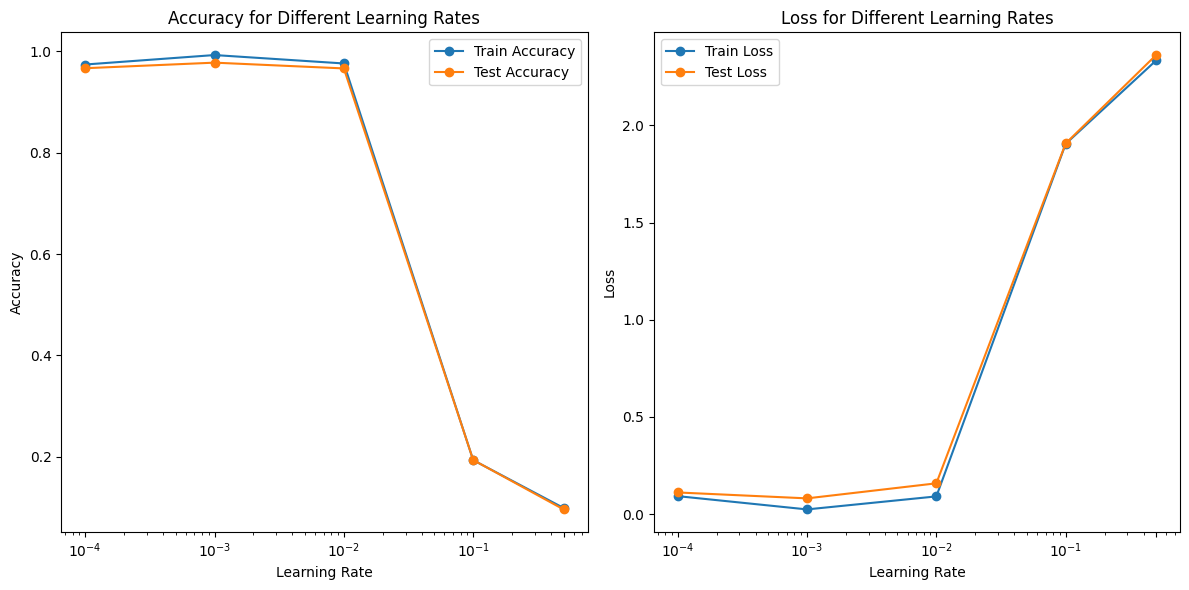

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(learning_rates, test_accuracies, label='Test Accuracy', marker='o')
plt.xscale('log')  # 학습률 축을 로그 스케일로 설정
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.legend()
plt.title('Accuracy for Different Learning Rates')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.plot(learning_rates, train_losses, label='Train Loss', marker='o')
plt.plot(learning_rates, test_losses, label='Test Loss', marker='o')
plt.xscale('log')  # 학습률 축을 로그 스케일로 설정
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.xticks(learning_rates)
plt.legend()
plt.title('Loss for Different Learning Rates')

plt.tight_layout()
plt.show()

7.3 서로 다른 optimizers (SGD, Momentum, RMSProp, Adam)에 대한 Accuracy 및 Loss 시각화

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 데이터 전처리
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# 서로 다른 optimizer
optimizers = ['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam']
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

def build_model(optimizer: tf.keras.optimizers.Optimizer) -> tf.keras.Model:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
     # Optimizer 인스턴스 생성
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 각 optimizers마다 모델 훈련 후 테스트 데이터로 평가
for op in optimizers:
    print(f"Training with optimizer name: {op}")

    # 옵티마이저 선택
    if op == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    elif op == 'SGD_with_momentum':
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    elif op == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    elif op == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model = build_model(optimizer)
    history = model.fit(X_train_full, y_train_full, epochs=8, batch_size=32, validation_split=0.1, verbose=1)

    # 훈련 데이터 평가
    train_loss, train_acc = model.evaluate(X_train_full, y_train_full, verbose=0)
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    # 테스트 데이터 평가
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)

Training with optimizer name: SGD


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1097 - loss: 186175520.0000 - val_accuracy: 0.1050 - val_loss: 3.2553
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1126 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 3.2552
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1151 - loss: 2.3007 - val_accuracy: 0.1050 - val_loss: 3.2553
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1125 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 3.2553
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1139 - loss: 2.3008 - val_accuracy: 0.1050 - val_loss: 3.2552
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1122 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 3.2552
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1138 - loss: 2.3012 - val_accuracy: 0.1050 - val_loss: 3.2553
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1118 - loss: 2.3014 - 

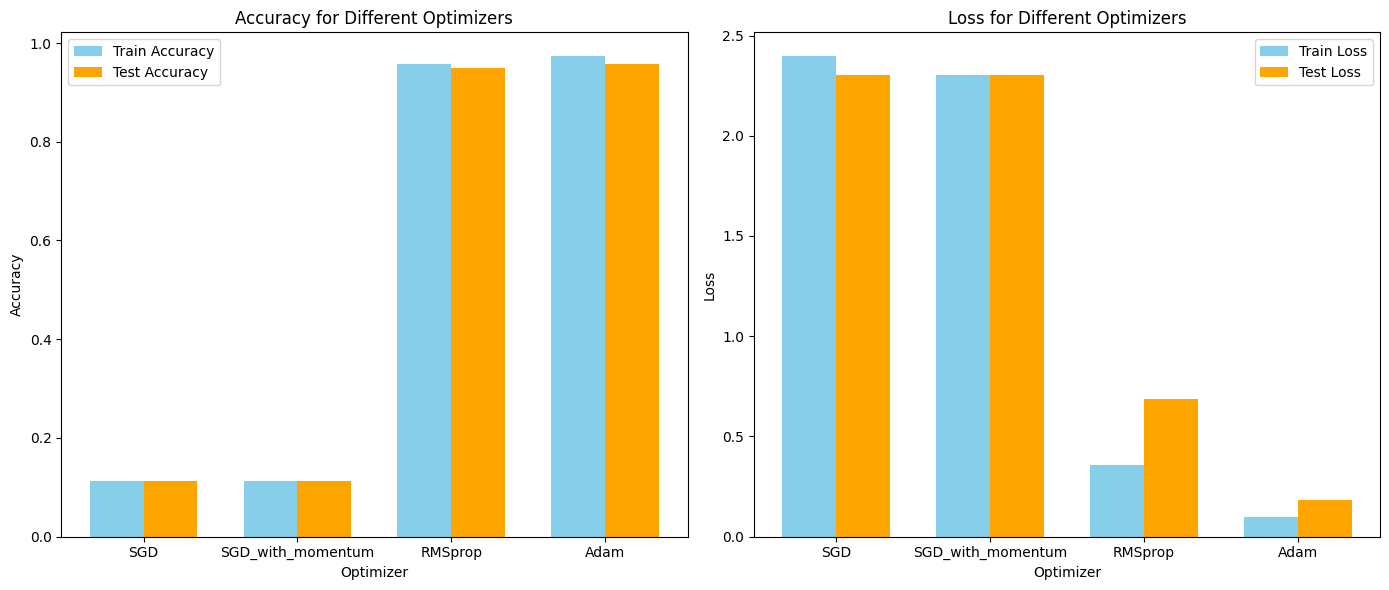

In [ ]:
# 시각화
bar_width = 0.35
x = np.arange(len(optimizers))

plt.figure(figsize=(14, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.bar(x - bar_width/2, train_accuracies, width=bar_width, label='Train Accuracy', color='skyblue')
plt.bar(x + bar_width/2, test_accuracies, width=bar_width, label='Test Accuracy', color='orange')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.xticks(x, optimizers)
plt.legend()
plt.title('Accuracy for Different Optimizers')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, train_losses, width=bar_width, label='Train Loss', color='skyblue')
plt.bar(x + bar_width/2, test_losses, width=bar_width, label='Test Loss', color='orange')
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.xticks(x, optimizers)
plt.legend()
plt.title('Loss for Different Optimizers')

plt.tight_layout()
plt.show()

7.4 서로 다른 number of hidden units에 대한 Accuracy 및 Loss 시각화



Training with 0 hidden layers...
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7583 - loss: 19.1749 - val_accuracy: 0.8908 - val_loss: 5.6026
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8744 - loss: 6.1872 - val_accuracy: 0.8928 - val_loss: 5.1761
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8792 - loss: 5.8103 - val_accuracy: 0.8570 - val_loss: 6.5460
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8836 - loss: 5.4525 - val_accuracy: 0.9075 - val_loss: 4.3589
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 5.3693 - val_accuracy: 0.8997 - val_loss: 4.9532
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8863 - loss: 5.1699 - val_accuracy: 0.8903 - val_loss: 5.3105
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 5.3199 - val_accuracy: 0.8615 - val_loss: 6.5139
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8912 - loss: 4.9397 - val_accuracy: 0.8

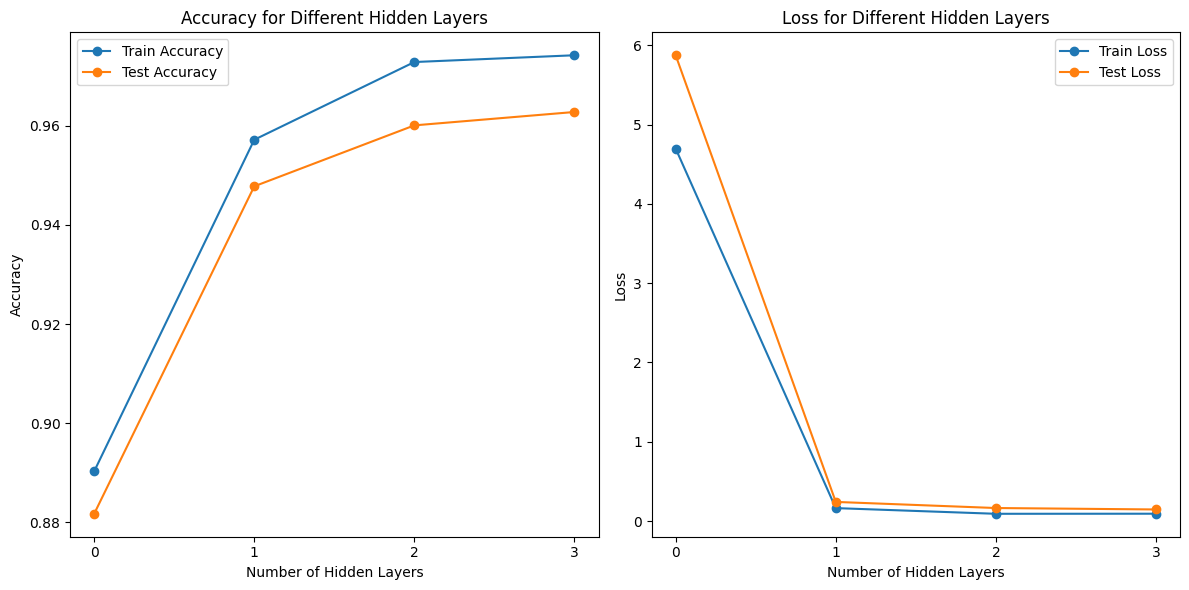

In [ ]:
# code with different kinds of hidden units
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def build_model(hidden_layers: int) -> tf.keras.Model:
    """
    히든 레이어의 개수를 인자로 받아 모델을 생성합니다.
    hidden_layers: 0, 1, 2, 3
    """
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))  # 입력 레이어

    # 히든 레이어 추가 (개수에 따라 동적으로 설정)
    if hidden_layers >= 1:
        model.add(tf.keras.layers.Dense(128, activation='relu'))  # 첫 번째 히든 레이어
    if hidden_layers >= 2:
        model.add(tf.keras.layers.Dense(64, activation='relu'))   # 두 번째 히든 레이어
    if hidden_layers >= 3:
        model.add(tf.keras.layers.Dense(32, activation='relu'))   # 세 번째 히든 레이어

    # 출력 레이어
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 히든 레이어 개수 설정 (0, 1, 2, 3)
hidden_layers_list = [0, 1, 2, 3]
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# 각 히든 레이어 개수에 대해 모델 훈련 및 평가
for hidden_layers in hidden_layers_list:
    print(f"\nTraining with {hidden_layers} hidden layers...")

    # 모델 생성 및 훈련
    model = build_model(hidden_layers)
    history = model.fit(X_train_full, y_train_full, epochs=8, batch_size=32, validation_split=0.1, verbose=1)

    # 훈련 데이터 평가
    train_loss, train_acc = model.evaluate(X_train_full, y_train_full, verbose=0)
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    # 테스트 데이터 평가
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)

# 시각화
plt.figure(figsize=(12, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.plot(hidden_layers_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(hidden_layers_list, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(hidden_layers_list)
plt.legend()
plt.title('Accuracy for Different Hidden Layers')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.plot(hidden_layers_list, train_losses, label='Train Loss', marker='o')
plt.plot(hidden_layers_list, test_losses, label='Test Loss', marker='o')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Loss')
plt.xticks(hidden_layers_list)
plt.legend()
plt.title('Loss for Different Hidden Layers')

plt.tight_layout()
plt.show()

7.5 서로 다른 nonlinear activation functions (ReLU, Sigmoid, Tanh, Leaky ReLU)에 대한 Accuracy 및 Loss 시각화


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 활성화 함수 리스트 정의
nl_act_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
learning_rate = 0.001
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

def build_model(activation_function: str) -> tf.keras.Model:
    """
    활성화 함수를 인자로 받아 모델을 생성합니다.
    activation_function: 'relu', 'sigmoid', 'tanh', 'leaky_relu'
    """
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

    # 히든 레이어 구성
    if activation_function == 'leaky_relu':
        model.add(tf.keras.layers.Dense(128))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(tf.keras.layers.Dense(64))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Dense(128, activation=activation_function))
        model.add(tf.keras.layers.Dense(64, activation=activation_function))

    # 출력 레이어
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # 모델 컴파일
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 각 활성화 함수에 대해 모델 훈련 및 테스트 데이터로 평가
for activation in nl_act_functions:
    print(f"\nTraining with activation function: {activation}")

    # 모델 생성 및 훈련
    model = build_model(activation)
    history = model.fit(X_train_full, y_train_full, epochs=8, batch_size=32, validation_split=0.1, verbose=1)

    # 훈련 데이터 평가
    train_loss, train_acc = model.evaluate(X_train_full, y_train_full, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # 결과 저장
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)




Training with activation function: relu
Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7348 - loss: 4.8485 - val_accuracy: 0.9057 - val_loss: 0.3844
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8946 - loss: 0.3975 - val_accuracy: 0.9430 - val_loss: 0.2646
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9241 - loss: 0.2754 - val_accuracy: 0.9490 - val_loss: 0.2240
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9421 - loss: 0.2063 - val_accuracy: 0.9508 - val_loss: 0.2057
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9542 - loss: 0.1633 - val_accuracy: 0.9633 - val_loss: 0.1340
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9600 - loss: 0.1431 - val_accuracy: 0.9628 - val_loss: 0.1321
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9654 - loss: 0.1215 - val_accuracy: 0.9667 - val_loss: 0.1224
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - a

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7840 - loss: 4.4722 - val_accuracy: 0.9288 - val_loss: 0.2699
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9197 - loss: 0.2958 - val_accuracy: 0.9458 - val_loss: 0.1890
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9416 - loss: 0.2027 - val_accuracy: 0.9597 - val_loss: 0.1418
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9521 - loss: 0.1617 - val_accuracy: 0.9612 - val_loss: 0.1431
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9655 - loss: 0.1164 - val_accuracy: 0.9683 - val_loss: 0.1194
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9663 - loss: 0.1132 - val_accuracy: 0.9688 - val_loss: 0.1268
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9734 - loss: 0.0905 - val_accuracy: 0.9692 - val_loss: 0.1210
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9750 - loss: 0.0819 - val_accuracy: 0

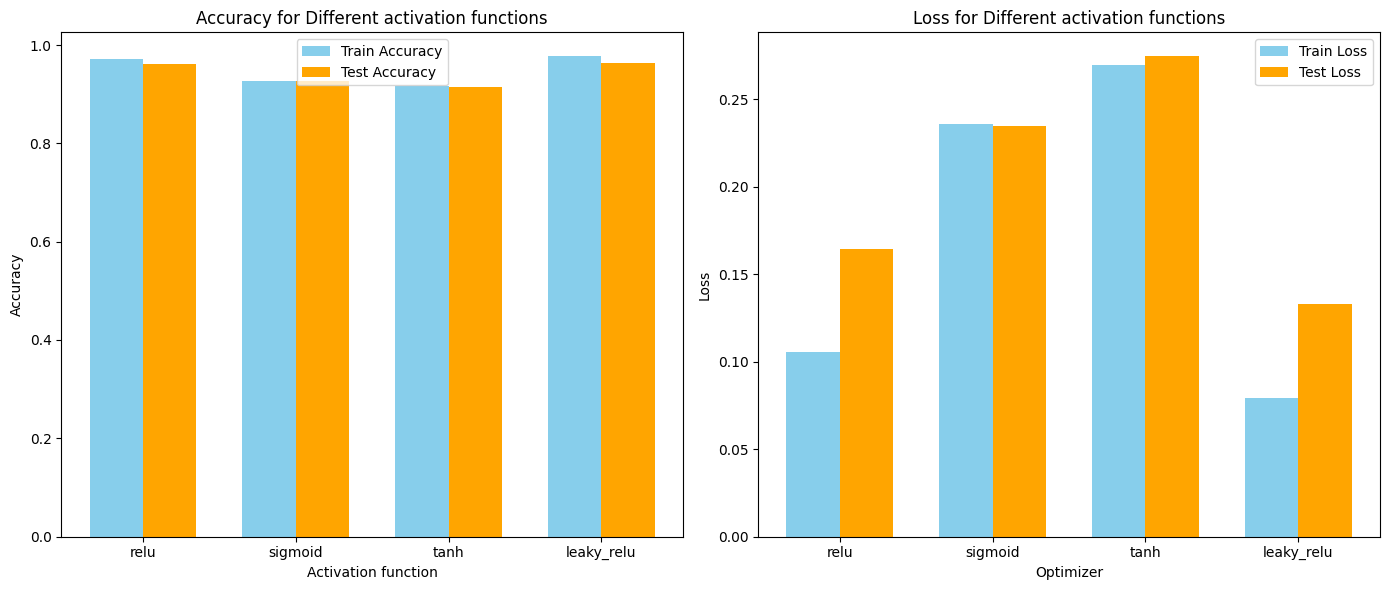

In [ ]:
# 시각화
bar_width = 0.35
x = np.arange(len(nl_act_functions))

plt.figure(figsize=(14, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.bar(x - bar_width/2, train_accuracies, width=bar_width, label='Train Accuracy', color='skyblue')
plt.bar(x + bar_width/2, test_accuracies, width=bar_width, label='Test Accuracy', color='orange')
plt.xlabel('Activation function')
plt.ylabel('Accuracy')
plt.xticks(x, nl_act_functions)
plt.legend()
plt.title('Accuracy for Different activation functions')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, train_losses, width=bar_width, label='Train Loss', color='skyblue')
plt.bar(x + bar_width/2, test_losses, width=bar_width, label='Test Loss', color='orange')
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.xticks(x, nl_act_functions)
plt.legend()
plt.title('Loss for Different activation functions')

plt.tight_layout()
plt.show()


# **2. [Convolutional Neural Network (CIFAR-10)]**

In [10]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

1) Data Preprocessing:

In [11]:
# Load the CIFAR-10 dataset using TensorFlow or scikit-learn.
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

훈련 데이터 크기: (50000, 32, 32, 3), 훈련 레이블 크기: (50000, 1)
테스트 데이터 크기: (10000, 32, 32, 3), 테스트 레이블 크기: (10000, 1)


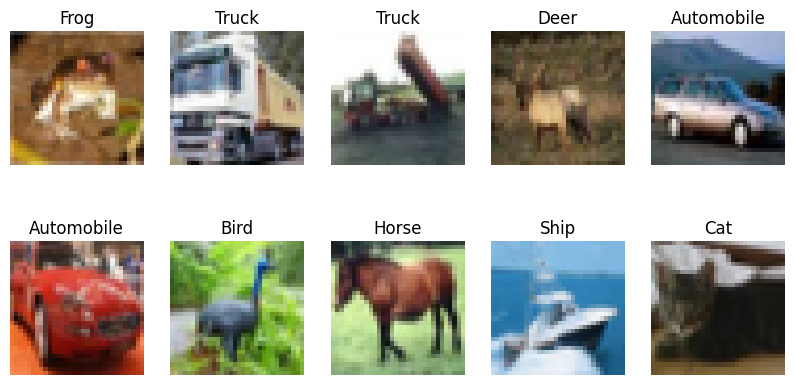

In [12]:
# 데이터셋 크기 출력
print(f"훈련 데이터 크기: {X_train_full.shape}, 훈련 레이블 크기: {y_train_full.shape}")
print(f"테스트 데이터 크기: {X_test.shape}, 테스트 레이블 크기: {y_test.shape}")

# 데이터 예제 시각화
plt.figure(figsize=(10, 5))
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_full[i])
    plt.title(class_names[y_train_full[i][0]])
    plt.axis('off')
plt.show()

In [13]:
# 픽셀 값을 0-1 범위로 정규화
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
# Flatten the labels
y_train_full, y_test = y_train_full.flatten(), y_test.flatten()

2) Build a Convolutional Neural Network:

In [14]:
#Use convolutional layers, pooling layers, and fully connected layers
def build_cnn_model() -> tf.keras.Model:
    """
    CNN 모델을 구성합니다.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax') # 출력 레이어 (10개 클래스)
    ])
    return model

# 모델 생성
model = build_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3) Compile and Train the Model:

In [15]:
# Compile the model using an appropriate loss function, optimizer, and metrics.
# Optimizer, loss, metrics 변경해보기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model on the training dataset.
history = model.fit(X_train_full, y_train_full, epochs=20, batch_size=64, validation_split=0.1, verbose = 1)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 86ms/step - accuracy: 0.3319 - loss: 1.8062 - val_accuracy: 0.5380 - val_loss: 1.3275
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.5666 - loss: 1.2286 - val_accuracy: 0.6192 - val_loss: 1.0658
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6355 - loss: 1.0297 - val_accuracy: 0.6228 - val_loss: 1.0853
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.6716 - loss: 0.9363 - val_accuracy: 0.6768 - val_loss: 0.9349
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7045 - loss: 0.8415 - val_accuracy: 0.7066 - val_loss: 0.8491
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.7316 - loss: 0.7622 - val_accuracy: 0.6892 - val_loss: 0.8908
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - accuracy: 0.7594 - loss: 0.6832 - val_accuracy: 0.7126 - val_loss: 0.8447
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.7759 - loss: 0.6342 - 

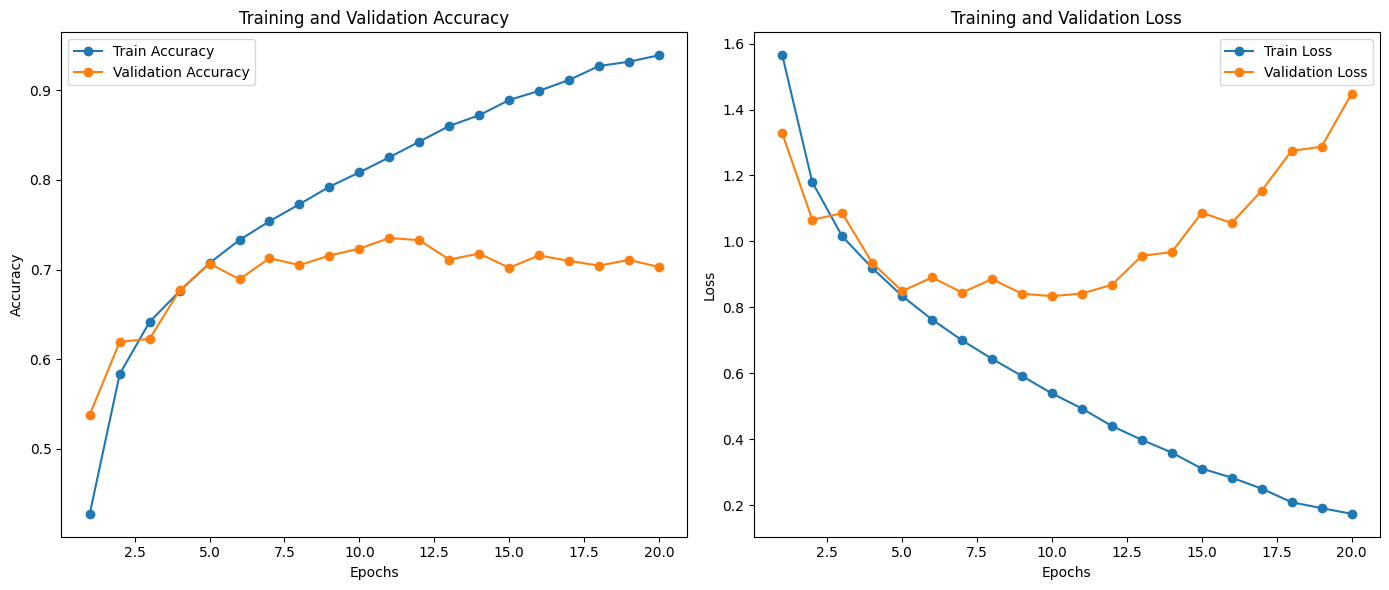

In [17]:
#  Monitor and visualize the training process
# history 객체에서 손실과 정확도 가져오기
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# 시각화 - Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 시각화 - Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

4) Evaluate the Model:

In [18]:
# Evaluate the trained model on the testing dataset.
test_loss, test_acc = model.evaluate(X_test, y_test)
# Calculate and report accuracy, and any other relevant metrics.
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7027 - loss: 1.4906
Test accuracy: 0.7025


In [19]:
# 다른 metrics 추가 - precision, recall
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
# 모델 예측값 생성 (확률 예측값을 클래스 레이블로 변환)
y_pred = model.predict(X_test).argmax(axis=1)

# Precision, Recall, F1 Score 계산
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Test Precision: 0.7072
Test Recall: 0.7025


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Confusion Matrix:
[[746  19  45  21  29   9   6  13  72  40]
 [ 35 789   7   2  13   4   4   7  23 116]
 [ 84   5 585  74 101  45  27  55  16   8]
 [ 28   8  63 511  88 153  32  67  17  33]
 [ 14   3  53  52 704  28  23 104  11   8]
 [ 15   7  47 181  56 585  11  83   6   9]
 [ 12   6  64 105  66  33 675  20   9  10]
 [ 10   1  29  38  53  28   3 820   3  15]
 [ 80  20  10  11  12   8   1   6 808  44]
 [ 42  65   8  16   6  11   4  16  30 802]]


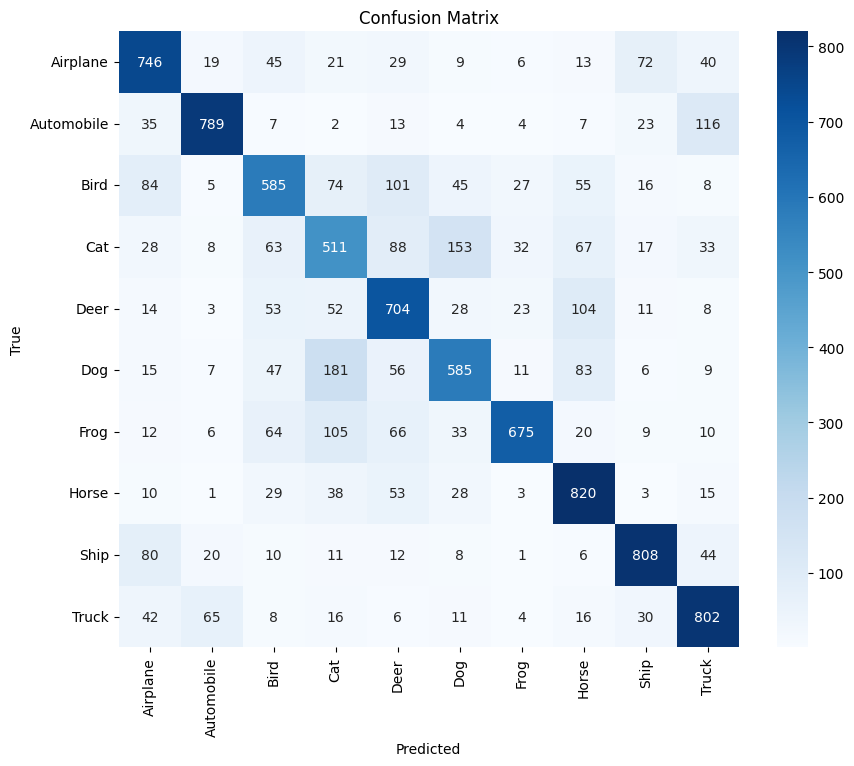

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.70      0.75      0.72      1000
  Automobile       0.85      0.79      0.82      1000
        Bird       0.64      0.58      0.61      1000
         Cat       0.51      0.51      0.51      1000
        Deer       0.62      0.70      0.66      1000
         Dog       0.65      0.58      0.61      1000
        Frog       0.86      0.68      0.76      1000
       Horse       0.69      0.82      0.75      1000
        Ship       0.81      0.81      0.81      1000
       Truck       0.74      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [21]:
# Confusion Matrix 및 Classification Report
y_pred = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report 시각화
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

5) Fine-Tuning: [이 아래의 코드를 통해 실제로 fine-tuning을 종합적으로 해보니 수치가 개선되지 않아 다른 ipynb에서 새로 진행했으므로 아래 코드는 무시한다. ]

In [22]:
# Experiment with hyperparameter tuning to improve the model performance.
# Try different epochs, optimization algorithms (SGD, Momentum, RMSProp, Adam, etc),learning rates, batch sizes, non-linear activation functions (such as ReLU, Sigmoid, Tanh), etc.
# activation="relu", activation="sigmoid", or activation="tanh"

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset using TensorFlow or scikit-learn.
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 픽셀 값을 0-1 범위로 정규화
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
# Flatten the labels
y_train_full, y_test = y_train_full.flatten(), y_test.flatten()

def build_cnn_model(activation_function: str) -> tf.keras.Model:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model


def build_and_train(
    optimizer_name: str = 'Adam',
    learning_rate: float = 0.001,
    epochs: int = 8,
    batch_size: int = 32,
    activation_function: str = 'relu'
):
    """
    다양한 인자를 받아 모델을 빌드하고 훈련합니다.

    Args:
    optimizer_name: 옵티마이저 종류 ('SGD', 'SGD_with_momentum', 'RMSprop', 'Adam')
    learning_rate: 학습률 (default: 0.001)
    epochs: 에포크 수 (default: 8)
    batch_size: 배치 크기 (default: 32)
    activation_function: 활성화 함수 ('relu', 'sigmoid', 'tanh', 'leaky_relu')

    Returns:
    history: 모델 훈련 기록
    """
    # 1. 옵티마이저 선택 및 생성
    if optimizer_name == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_with_momentum':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer name")

    # 2. CNN 모델 빌드
    model = build_cnn_model(activation_function)

    # 3. 모델 컴파일
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 4. 모델 훈련
    history = model.fit(X_train_full, y_train_full, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

    # 5. 모델 평가
    train_loss, train_acc = model.evaluate(X_train_full, y_train_full, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)


    print(f"Training complete with {optimizer_name}, LR={learning_rate}, Epochs={epochs}, Batch size={batch_size}, Activation={activation_function}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    return history, train_acc, test_acc, train_loss, test_loss


5.1 서로 다른 epochs

In [24]:
import pickle

epochs_list = [2, 8, 16, 32]
train_accuracies1 = []
test_accuracies1 = []
train_losses1 = []
test_losses1 = []

# 각 Epoch마다 모델을 훈련하고 평가
for ep in epochs_list:
    print(f"Training with {ep} epochs...")
    history, train_acc, test_acc, train_loss, test_loss = build_and_train(epochs=ep)

    # 정확도와 손실 기록
    train_accuracies1.append(train_acc)
    test_accuracies1.append(test_acc)
    train_losses1.append(train_loss)
    test_losses1.append(test_loss)

Training with 2 epochs...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 41ms/step - accuracy: 0.3961 - loss: 1.6668 - val_accuracy: 0.5808 - val_loss: 1.1708
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6147 - loss: 1.0940 - val_accuracy: 0.6610 - val_loss: 0.9807


KeyboardInterrupt: 

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.plot(epochs_list, train_accuracies1, label='Train Accuracy', marker='o')
plt.plot(epochs_list, test_accuracies1, label='Test Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs_list)
plt.legend()
plt.title('Accuracy for Selected Epochs')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs_list, train_losses1, label='Train Loss', marker='o')
plt.plot(epochs_list, test_losses1, label='Test Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs_list)
plt.legend()
plt.title('Loss for Selected Epochs')

plt.tight_layout()
plt.show()

5.2 서로 다른 learning rates

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
train_accuracies2 = []
test_accuracies2 = []
train_losses2 = []
test_losses2 = []

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    history, train_acc, test_acc, train_loss, test_loss = build_and_train(learning_rate=lr)

    # 정확도와 손실 기록
    train_accuracies2.append(train_acc)
    test_accuracies2.append(test_acc)
    train_losses2.append(train_loss)
    test_losses2.append(test_loss)

import pickle
# 리스트 저장
with open('train_accuracies.pkl', 'wb') as f:
    pickle.dump(train_accuracies2, f)

with open('test_accuracies.pkl', 'wb') as f:
    pickle.dump(test_accuracies2, f)

with open('train_losses.pkl', 'wb') as f:
    pickle.dump(train_losses2, f)

with open('test_losses.pkl', 'wb') as f:
    pickle.dump(test_losses2, f)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 시각화
plt.figure(figsize=(12, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_accuracies2, label='Train Accuracy', marker='o')
plt.plot(learning_rates, test_accuracies2, label='Test Accuracy', marker='o')
plt.xscale('log')  # 학습률 축을 로그 스케일로 설정
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.legend()
plt.title('Accuracy for Different Learning Rates')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.plot(learning_rates, train_losses2, label='Train Loss', marker='o')
plt.plot(learning_rates, test_losses2, label='Test Loss', marker='o')
plt.xscale('log')  # 학습률 축을 로그 스케일로 설정
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.xticks(learning_rates)
plt.legend()
plt.title('Loss for Different Learning Rates')

plt.tight_layout()
plt.show()


5.3 서로 다른 batch size

In [ ]:
# 서로 다른 batch sizes 설정
batch_sizes = [16, 32, 64, 128, 256]
train_accuracies3 = []
test_accuracies3 = []
train_losses3 = []
test_losses3 = []

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    history, train_acc, test_acc, train_loss, test_loss = build_and_train(epoch=8, batch_size=batch_size)

    # 정확도와 손실 기록
    train_accuracies3.append(train_acc)
    test_accuracies3.append(test_acc)
    train_losses3.append(train_loss)
    test_losses3.append(test_loss)


In [ ]:
# 시각화
x = np.arange(len(batch_sizes))
plt.figure(figsize=(14, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.bar(x - 0.2, train_accuracies3, 0.4, label='Train Accuracy', color='skyblue')
plt.bar(x + 0.2, test_accuracies3, 0.4, label='Test Accuracy', color='orange')
plt.xticks(x, batch_sizes)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for Different Batch Sizes')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.bar(x - 0.2, train_losses3, 0.4, label='Train Loss', color='skyblue')
plt.bar(x + 0.2, test_losses3, 0.4, label='Test Loss', color='orange')
plt.xticks(x, batch_sizes)
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss for Different Batch Sizes')

plt.tight_layout()
plt.show()


5.4 서로 다른 optimizer (SGD, Momentum, RMSProp, Adam) 실험

In [ ]:
optimizers = ['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam']
train_accuracies4 = []
test_accuracies4 = []
train_losses4 = []
test_losses4 = []

for opt in optimizers:
    print(f"Training with optimizer: {opt}")
    history, train_acc, test_acc, train_loss, test_loss = build_and_train(optimizer_name=opt)

    # 정확도와 손실 기록
    train_accuracies4.append(train_acc)
    test_accuracies4.append(test_acc)
    train_losses4.append(train_loss)
    test_losses4.append(test_loss)



In [ ]:
# 시각화
x = np.arange(len(optimizers))
plt.figure(figsize=(14, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.bar(x - 0.2, train_accuracies4, 0.4, label='Train Accuracy')
plt.bar(x + 0.2, test_accuracies4, 0.4, label='Test Accuracy')
plt.xticks(x, optimizers)
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for Different Optimizers')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.bar(x - 0.2, train_losses4, 0.4, label='Train Loss')
plt.bar(x + 0.2, test_losses4, 0.4, label='Test Loss')
plt.xticks(x, optimizers)
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss for Different Optimizers')

plt.tight_layout()
plt.show()


5.5 서로 다른 non-linear activation functionsnon-linear activation functions (such as ReLU, Sigmoid, Tanh)


In [ ]:
nl_act_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
train_accuracies5 = []
test_accuracies5 = []
train_losses5 = []
test_losses5 = []

for activation in nl_act_functions:
    print(f"Training with activation function: {activation}")
    history, train_acc, test_acc, train_loss, test_loss = build_and_train(activation_function=activation)

    # 정확도와 손실 기록
    train_accuracies5.append(train_acc)
    test_accuracies5.append(test_acc)
    train_losses5.append(train_loss)
    test_losses5.append(test_loss)


In [ ]:
# 시각화
bar_width = 0.35
x = np.arange(len(nl_act_functions))

plt.figure(figsize=(14, 6))

# Accuracy 시각화
plt.subplot(1, 2, 1)
plt.bar(x - bar_width/2, train_accuracies5, width=bar_width, label='Train Accuracy', color='skyblue')
plt.bar(x + bar_width/2, test_accuracies5, width=bar_width, label='Test Accuracy', color='orange')
plt.xlabel('Activation function')
plt.ylabel('Accuracy')
plt.xticks(x, nl_act_functions)
plt.legend()
plt.title('Accuracy for Different activation functions')

# Loss 시각화
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, train_losses5, width=bar_width, label='Train Loss', color='skyblue')
plt.bar(x + bar_width/2, test_losses5, width=bar_width, label='Test Loss', color='orange')
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.xticks(x, nl_act_functions)
plt.legend()
plt.title('Loss for Different activation functions')

plt.tight_layout()
plt.show()

fine tuning 이후의 metrics 변화

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset using TensorFlow or scikit-learn.
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 픽셀 값을 0-1 범위로 정규화
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
# Flatten the labels
y_train_full, y_test = y_train_full.flatten(), y_test.flatten()

def build_cnn_model(activation_function: str) -> tf.keras.Model:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model


def build_and_train(
    optimizer_name: str = 'Adam',
    learning_rate: float = 0.001,
    epochs: int = 8,
    batch_size: int = 32,
    activation_function: str = 'relu'
):
    """
    다양한 인자를 받아 모델을 빌드하고 훈련합니다.

    Args:
    optimizer_name: 옵티마이저 종류 ('SGD', 'SGD_with_momentum', 'RMSprop', 'Adam')
    learning_rate: 학습률 (default: 0.001)
    epochs: 에포크 수 (default: 8)
    batch_size: 배치 크기 (default: 32)
    activation_function: 활성화 함수 ('relu', 'sigmoid', 'tanh', 'leaky_relu')

    Returns:
    history: 모델 훈련 기록
    """
    # 1. 옵티마이저 선택 및 생성
    if optimizer_name == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_with_momentum':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer name")

    # 2. CNN 모델 빌드
    model = build_cnn_model(activation_function)

    # 3. 모델 컴파일
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 4. 모델 훈련
    history = model.fit(X_train_full, y_train_full, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

    # 5. 모델 평가
    train_loss, train_acc = model.evaluate(X_train_full, y_train_full, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)


    print(f"Training complete with {optimizer_name}, LR={learning_rate}, Epochs={epochs}, Batch size={batch_size}, Activation={activation_function}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    return model,history, train_acc, test_acc, train_loss, test_loss


model, history, train_acc, test_acc, train_loss, test_loss = build_and_train(epochs =8, learning_rate=0.0001, batch_size=128, optimizer_name = 'Adam',activation_function = 'leaky_relu' )

# Calculate and report accuracy, and any other relevant metrics.
print(f"Test accuracy: {test_acc:.4f}")
# 다른 metrics 추가 - precision, recall
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
# 모델 예측값 생성 (확률 예측값을 클래스 레이블로 변환)
y_pred = model.predict(X_test).argmax(axis=1)

# Precision, Recall, F1 Score 계산
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

# Confusion Matrix 및 Classification Report
y_pred = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report 시각화
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))